In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv("titanic.csv")
df.drop(columns=["Name","Ticket"],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [116]:
df_num = df[["Age","SibSp","Parch","Fare"]]
df_cat = df[["Sex","Pclass","Survived","Embarked"]]

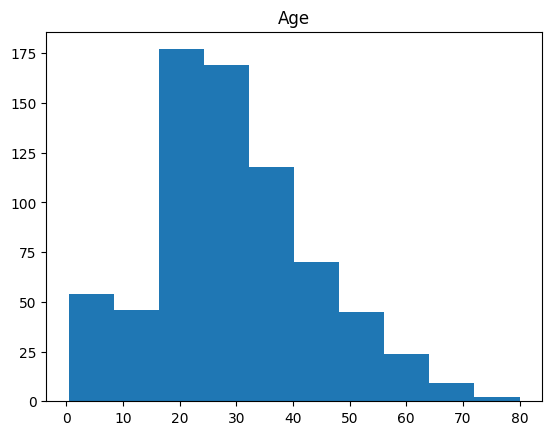

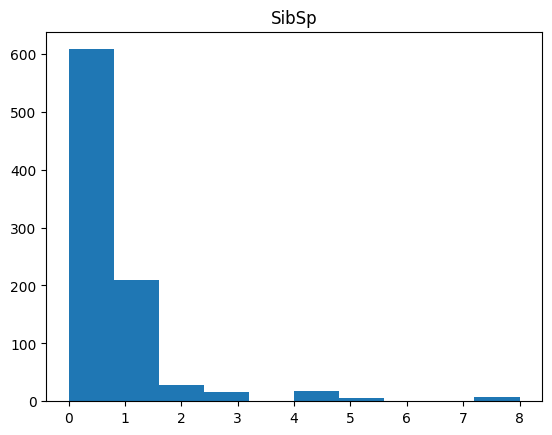

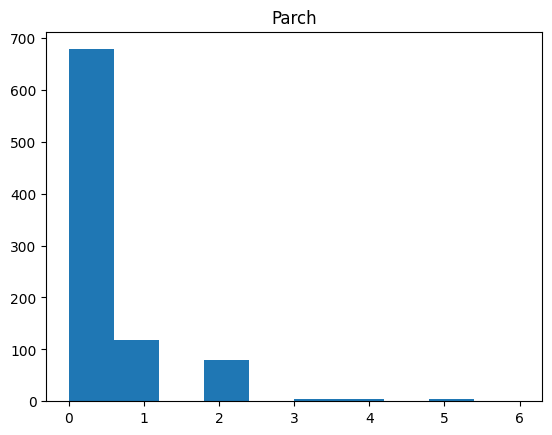

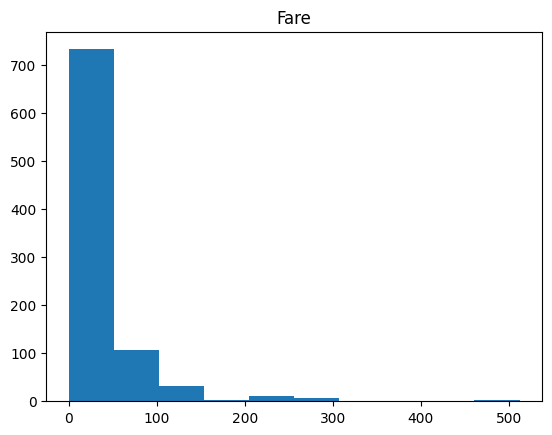

In [117]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [118]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
#df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode()[0])
df[df["Cabin"].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q
7,8,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,7.0500,NaN,S
885,886,0,3,female,39.0,0,5,29.1250,NaN,Q
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S


In [120]:
df.drop(columns=["Cabin"],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [121]:
df.replace("male",1,inplace=True)
df.replace("female",0,inplace=True)
df=pd.get_dummies(df,columns=["Embarked"])
df=df*1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5272\3585145578.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("female",0,inplace=True)


In [122]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [123]:
df.drop(columns=['PassengerId'],inplace=True)

In [124]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


<Axes: >

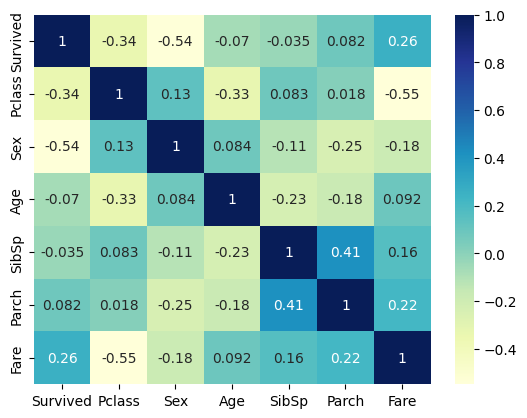

In [125]:
numdf = df.iloc[:,:7]
corrmat = numdf.corr()
sns.heatmap(corrmat,annot=True,cmap='YlGnBu')

In [126]:
x = df.drop(["Survived"],axis=1)
y = df["Survived"]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0
2,3,0,26.000000,0,0,7.9250,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1
4,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1
887,1,0,19.000000,0,0,30.0000,0,0,1
888,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [133]:
size=int(x.shape[0]*0.8)
x_train=x[:size]
y_train = y[:size]
x_test = x[size:]
y_test = x[size:]
y_test.shape

(179, 9)

In [142]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_weights(self, X):
        n_features = X.shape[1]
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

    def compute_cost(self, y_hat, y):
        m = y.shape[0]
        return -(1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def gradient_descent(self, X, y, y_hat):
        m = y.shape[0]
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def train(self, X, y):
        self.initialize_weights(X)
        for i in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            y_hat = self.sigmoid(z)
            cost = self.compute_cost(y_hat, y)
            self.costs.append(cost)
            self.gradient_descent(X, y, y_hat)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        return (y_hat > 0.5).astype(int)

    def evaluate(self, y_true, y_pred):
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    def plot_cost(self):
        plt.plot(self.costs)
        plt.title('Cost Function during Training')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()

In [143]:
model = LogisticRegression(learning_rate=0.01,iterations=1000)
model.train(x_train,y_train)
y_pred = model.predict(x_test)
f1_score = model.evaluate(y_test,y_pred)
model.plot_cost()

AttributeError: 'Series' object has no attribute 'reshape'